In [1]:
from rc_car.simulator.sim_interface import *
import math
import cv2
import os
import ast

In [161]:
# Read image and corresponding file with lanes with image pixels
img = cv2.imread('lanes.jpg')
lanes = []
with open('lanes.txt', 'r') as f:
    for line in f.readlines():
        lane = ast.literal_eval(line)
        lanes.append(lane)

In [3]:
sim = GymDonkeyInterface("donkey-mountain-track-v0","/home/robot/DonkeySimLinux/donkey_sim.x86_64" ,9091)
cam_config = sim.cam_config



starting DonkeyGym env
donkey subprocess started
Roi None
connecting to 127.0.0.1 9091
loading scene 4 mountain_track


/home/robot/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
waiting for sim to start..


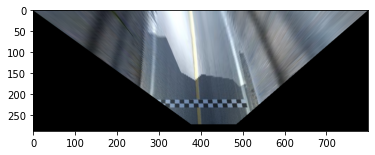

[[246.94784951   0.         400.        ]
 [  0.         246.94784951 144.        ]
 [  0.           0.           1.        ]]
[0.  0.5 1. ]
[[-2.94986994e+02  2.29084956e+02  4.00000000e+02]
 [ 5.67037392e+01 -2.34560847e+01  2.67473925e+02]
 [-1.62058978e-01  7.72812970e-01  1.00000000e+00]]


In [265]:
IMAGE_H,IMAGE_W,_ = img.shape
src = np.float32([[0, IMAGE_H], [778, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[400, IMAGE_H], [464, IMAGE_H], [0, 0], [IMAGE_W, 0]])

img_w = img[120:(60+IMAGE_H), 0:IMAGE_W]
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(img_w, M, (IMAGE_W, IMAGE_H)) # Image warping

plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
plt.show()
focal_length = cam_config['img_w'] / \
                (2*math.tan(cam_config['fov']/2))
center_x = cam_config['img_w'] / 2
center_y = cam_config['img_h'] / 2

t = np.array([cam_config['offset_x'],
              cam_config['offset_y'],
              cam_config['offset_z']])
R = cv2.Rodrigues(np.array([math.radians(cam_config["rot_x"]),
                            math.radians(-90),
                            math.radians(-180)], dtype=np.float64))[0]
K = np.array([[focal_length, 0, center_x],
              [0, focal_length, center_y],
              [0,0,1]])

print(K)
H = np.dot(K,np.column_stack((R[:,0],R[:,1],t)))
print(t)
print(H)

In [266]:
lanes_proj = []
for line in lanes:
    for p in line:

        p = np.array([p[0], p[1], 1], dtype=np.float32)
        #p = np.dot(M, p)
        #p = p.T
        #lMat = np.linalg.inv(R) * np.linalg.inv(K) * p
        #rMat = np.linalg.inv(R) * t

        #s = (t[1] + rMat[2,0]/lMat[2,0])
        #proj = np.linalg.inv(R) * (s*np.linalg.inv(K)*p-t)
        #proj = np.dot(H,p)

        world_p = np.array(np.dot(np.linalg.inv(H), p))
        scalar = world_p[2]
        proj = [world_p[0]/scalar, world_p[1]/scalar, 0]

        #print(proj)
        lanes_proj.append(proj)

[[2.5515200542209904, 2.2106407735192906, 0], [2.5515200542209904, 2.2106407735192906, 0], [2.128379029300942, 2.1294726056620172, 0], [1.6249188564468446, 2.0002053263593407, 0], [1.1191987789968976, 1.8664904630966201, 0], [1.011155310778709, 0.34592784360635936, 0], [1.011155310778709, 0.34592784360635936, 0], [0.9618295219984584, 0.3712872471164904, 0], [0.915048698973284, 0.4001552422867201, 0], [0.8657281868498071, 0.43059045513040217, 0], [0.8189403383857212, 0.4651091705897573, 0], [0.7639844983685785, 0.4991840912746007, 0], [0.7112881612281043, 0.5378648783555869, 0], [0.6496473349877451, 0.5762680057638189, 0], [0.5898794444367121, 0.6199178135801666, 0], [0.5202242816799043, 0.6635225368289781, 0], [0.4518973519719962, 0.7131717083117354, 0], [0.39101250096930334, 0.7729573970000729, 0], [0.3063104884172859, 0.8270144723180489, 0], [0.2023624505820289, 0.8778188643154639, 0], [0.10391608035252214, 0.9400430310041832, 0], [0.004215669842241361, 1.011405609440366, 0], [-0.111

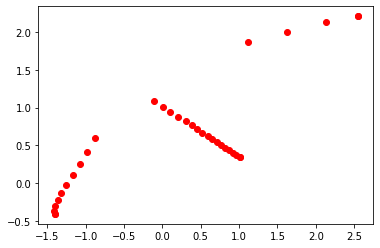

In [267]:
print(lanes_proj)
import matplotlib.pyplot as plt
lanes_proj_ipm = lanes_proj
#lanes_proj_ipm = [np.dot(M,p) for p in lanes_proj]
x = [x for x,y,z in lanes_proj_ipm]
y = [y for x,y,z in lanes_proj_ipm]
plt.plot(x,y,'ro')




